In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mtl
import scipy.stats as st
import missingno  as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Trabalhando com a base de Macapá

- ### Vamos conhecer um pouco sobre a base de dados

In [41]:
macapa = pd.read_csv('../data/macapa.txt')

In [42]:
# dimensão do dataframe
macapa.shape

(8604, 20)

In [43]:
# features
macapa.columns

Index(['codigo_estacao', 'data', 'hora', 'temp_inst', 'temp_max', 'temp_min',
       'umid_inst', 'umid_max', 'umid_min', 'pto_orvalho_inst',
       'pto_orvalho_max', 'pto_orvalho_min', 'pressao', 'pressao_max',
       'pressao_min', 'vento_vel', 'vento_direcao', 'vento_rajada', 'radiacao',
       'precipitacao'],
      dtype='object')

In [44]:
# algumas informações
macapa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   codigo_estacao    8604 non-null   object 
 1   data              8604 non-null   object 
 2   hora              8604 non-null   int64  
 3   temp_inst         8604 non-null   float64
 4   temp_max          8604 non-null   float64
 5   temp_min          8604 non-null   float64
 6   umid_inst         8604 non-null   int64  
 7   umid_max          8604 non-null   int64  
 8   umid_min          8604 non-null   int64  
 9   pto_orvalho_inst  8604 non-null   float64
 10  pto_orvalho_max   8604 non-null   float64
 11  pto_orvalho_min   8604 non-null   float64
 12  pressao           8604 non-null   float64
 13  pressao_max       8604 non-null   float64
 14  pressao_min       8604 non-null   float64
 15  vento_vel         7726 non-null   float64
 16  vento_direcao     7731 non-null   float64


In [45]:
# tabela percentual de dados faltantes

total = macapa.isnull().sum().sort_values(ascending=False)
percent = (macapa.isnull().sum()/macapa.isnull().count()).sort_values(ascending=False)


missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Dados Ausentes', '% Percentual'])
missing_data.index.name =' Variaveis numericas'
missing_data.head(20)

,Dados Ausentes,% Percentual
Variaveis numericas,,
vento_rajada,884,0.102743
vento_vel,878,0.102046
vento_direcao,873,0.101464
precipitacao,0,0.000000
umid_max,0,0.000000
data,0,0.000000
hora,0,0.000000
temp_inst,0,0.000000
temp_max,0,0.000000


In [46]:
macapa.vento_rajada.value_counts()

2.3     175
2.6     160
3.0     151
2.9     148
2.8     142
       ... 
13.7      1
13.5      1
12.3      1
13.4      1
0.9       1
Name: vento_rajada, Length: 129, dtype: int64

In [47]:
macapa.vento_vel.value_counts()

1.1    439
1.0    420
1.2    398
0.8    380
0.9    378
1.3    352
0.7    320
1.4    292
1.5    258
0.6    251
1.7    229
1.6    202
1.8    189
2.5    183
1.9    178
2.8    175
2.2    174
2.1    171
2.7    169
2.0    166
2.3    160
3.3    148
2.4    148
2.6    146
3.1    142
3.2    142
2.9    135
3.4    129
0.5    121
3.0    116
3.5    112
3.7     99
3.6     95
3.8     82
0.4     81
4.0     77
3.9     73
4.1     71
4.2     47
4.3     41
0.3     40
4.4     39
4.6     29
4.5     27
4.7     27
0.2     18
4.8     11
5.3      8
4.9      7
5.0      6
5.1      5
5.4      4
0.1      4
5.2      3
5.5      3
6.5      2
6.0      1
5.7      1
6.2      1
5.8      1
Name: vento_vel, dtype: int64

In [48]:
# 0s 10 valore que mais se repetem na coluna precipitação
macapa.precipitacao.value_counts()

0.0     6949
////     744
0.2      242
0.4      107
0.8       66
        ... 
56.6       1
13.2       1
16.2       1
31.0       1
18.8       1
Name: precipitacao, Length: 83, dtype: int64

In [49]:
# algumas caracteristicas estatisticas
macapa.describe()

,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,radiacao
count,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,7726.000000,7731.000000,8604.000000
mean,11.503138,27.309263,27.817445,26.845979,78.780219,81.052882,76.324268,23.022513,23.451104,22.606416,1009.978266,1010.265098,1009.692259,1.914613,137.076575,820.151086
std,6.919918,2.687537,2.867672,2.514849,13.110096,12.009794,14.121594,0.904848,0.868365,1.019314,1.957438,1.939549,1.950011,1.093710,93.360529,1141.286828
min,0.000000,22.000000,22.100000,21.500000,35.000000,38.000000,31.000000,16.000000,17.500000,14.600000,1003.600000,1003.800000,1003.400000,0.100000,1.000000,-3.600000
25%,6.000000,25.000000,25.300000,24.700000,69.000000,72.000000,65.000000,22.500000,23.000000,22.100000,1008.600000,1008.900000,1008.300000,1.000000,61.500000,-3.420000
50%,12.000000,26.800000,27.400000,26.200000,82.000000,85.000000,79.000000,23.100000,23.500000,22.800000,1010.000000,1010.300000,1009.700000,1.600000,126.000000,30.005000
75%,17.250000,29.400000,30.200000,28.800000,91.000000,92.000000,89.000000,23.600000,24.000000,23.300000,1011.400000,1011.700000,1011.100000,2.700000,196.000000,1561.000000
max,23.000000,34.700000,34.800000,33.400000,96.000000,96.000000,96.000000,26.300000,26.800000,25.000000,1015.500000,1015.800000,1015.500000,6.500000,360.000000,3890.000000


In [50]:
# Variaveis numéricas
varNum = macapa.select_dtypes(include=[np.number])
varNum.columns

Index(['hora', 'temp_inst', 'temp_max', 'temp_min', 'umid_inst', 'umid_max',
       'umid_min', 'pto_orvalho_inst', 'pto_orvalho_max', 'pto_orvalho_min',
       'pressao', 'pressao_max', 'pressao_min', 'vento_vel', 'vento_direcao',
       'radiacao'],
      dtype='object')

In [51]:
# variaveis categoricas
varCat = macapa.select_dtypes(include=[np.object])
varCat.columns

Index(['codigo_estacao', 'data', 'vento_rajada', 'precipitacao'], dtype='object')

In [52]:
# resumindo
print(f'Total de Variaveis Numericas: {varNum.columns.value_counts().sum()}')
print(f'Total de Variaveis Categoricas: {varCat.columns.value_counts().sum()}')

Total de Variaveis Numericas: 16
Total de Variaveis Categoricas: 4


# Visualizando Valores Ausentes

- ### Matriz de Nulidade

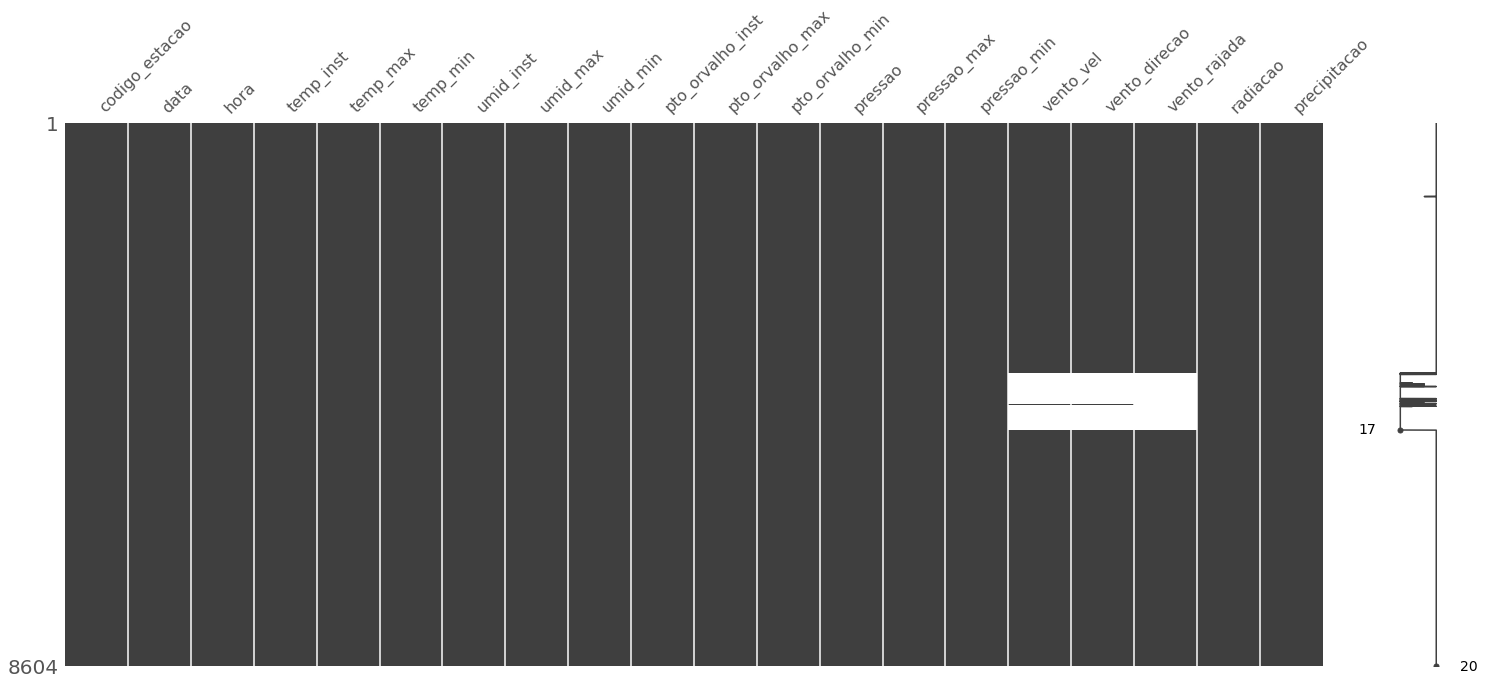

In [53]:
msno.matrix(macapa)

- ## HeatMap de Nulidade

Mede a correlação de nulidade: Quão fortemente a presença ou ausência de uma variável afeta a presença de outra:

### Legenda:

- A correlação de nulidade varia de -1 a 0
- correlação de nulidade varia de -1 (se uma variável parece a outra definitivamente não aparece) 
- Se for 0 (variáveis que aparecem ou não aparecem não têm efeito uma sobre a outra)
- Se for 1 (se uma variável aparece, a outra definitivamente também tem influencia sobre a outra)
- As entradas marcadas <1ou > -1 estão com uma correlação próxima de ser exatamente negativa ou 
  positiva. 

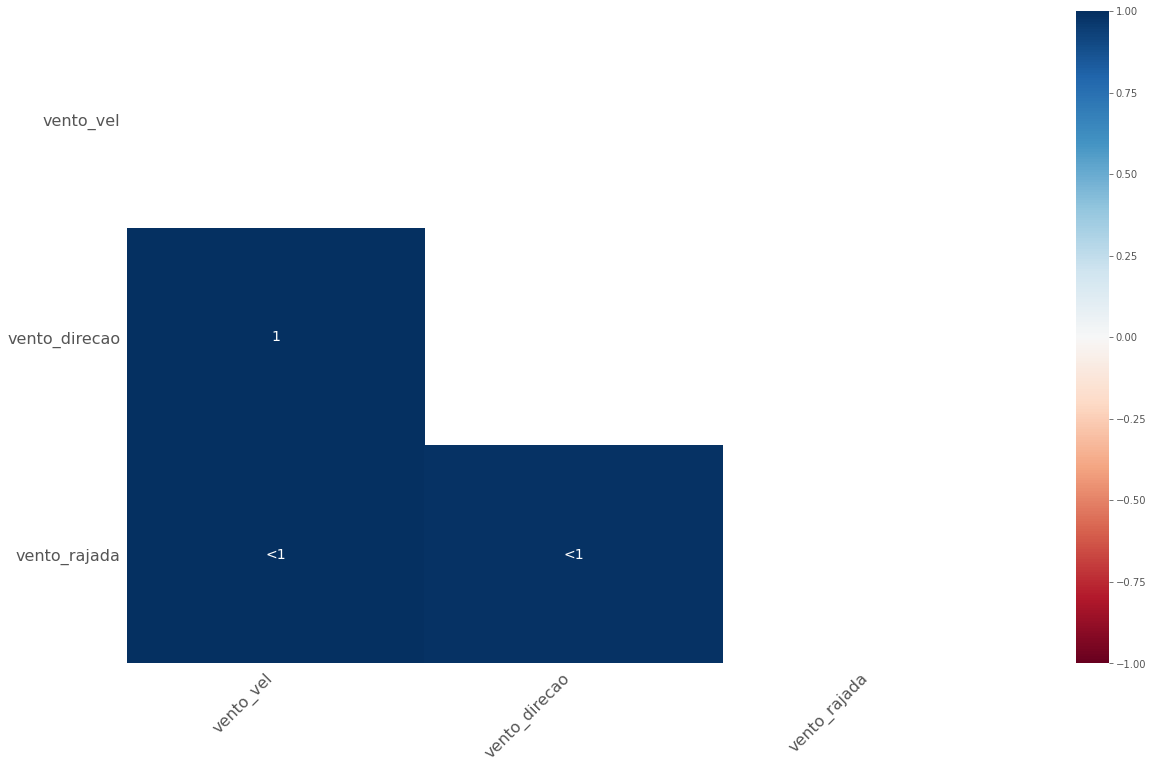

In [54]:
msno.heatmap(macapa)

- ## Grafíco de Barras de Nulidade

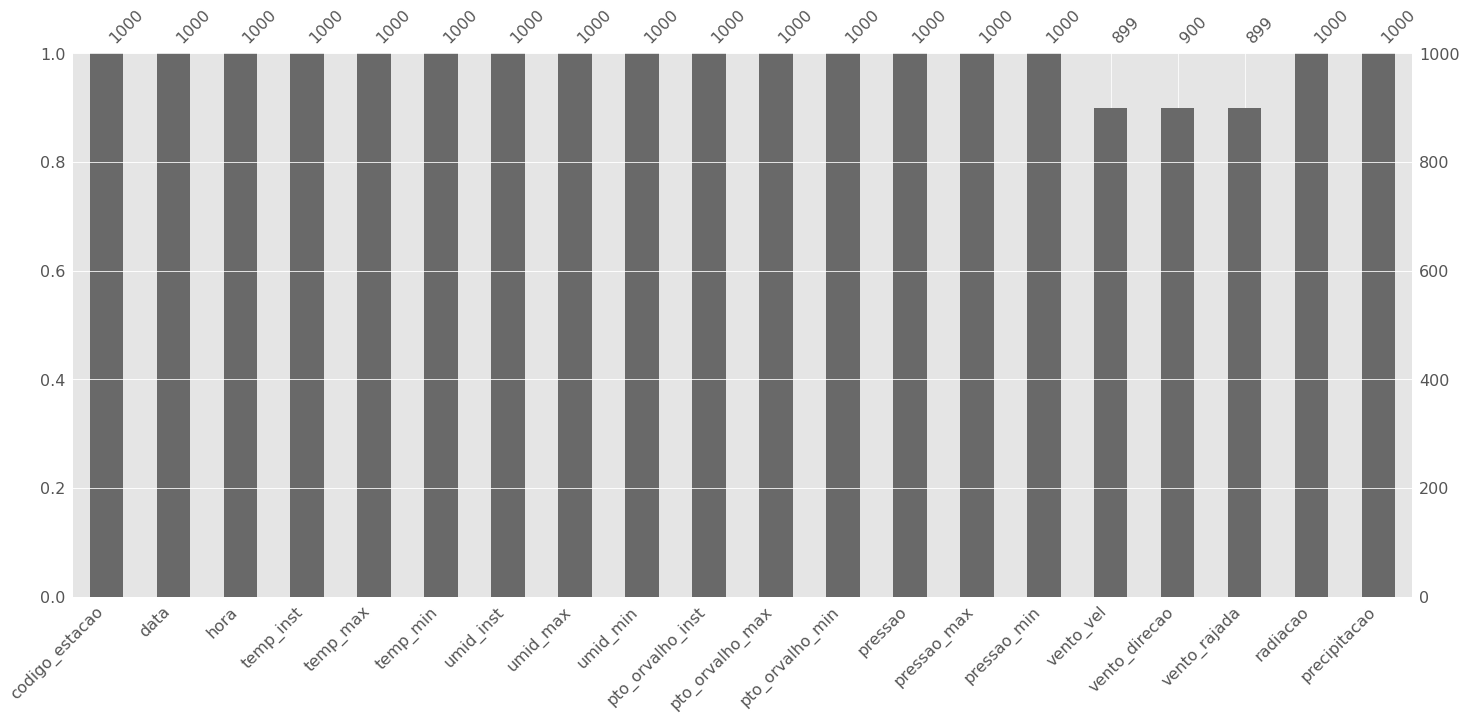

In [55]:
msno.bar(macapa.sample(1000))

# Estimando os valores de Skewness e Kurtose

In [56]:
# Estimando Skewness 
macapa.skew()

hora               -0.001092
temp_inst           0.449021
temp_max            0.369087
temp_min            0.519510
umid_inst          -0.581108
umid_max           -0.714701
umid_min           -0.448266
pto_orvalho_inst   -0.878786
pto_orvalho_max    -0.329269
pto_orvalho_min    -1.260088
pressao            -0.036723
pressao_max        -0.067762
pressao_min        -0.002488
vento_vel           0.736734
vento_direcao       0.643492
radiacao            1.117274
dtype: float64

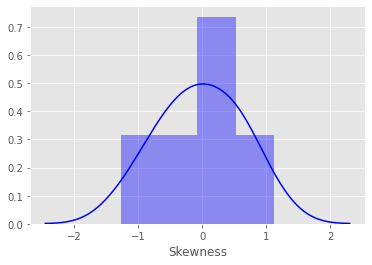

In [57]:
# grafico dos valores de Skewness do dataset
sns.distplot(macapa.skew(),color='blue',axlabel ='Skewness')

In [58]:
# Estimando Kurtose
macapa.kurt()

hora               -1.203028
temp_inst          -0.902071
temp_max           -1.005798
temp_min           -0.815527
umid_inst          -0.803118
umid_max           -0.611709
umid_min           -0.953982
pto_orvalho_inst    2.493275
pto_orvalho_max     1.106963
pto_orvalho_min     3.344362
pressao            -0.358456
pressao_max        -0.356026
pressao_min        -0.345852
vento_vel          -0.301801
vento_direcao      -0.303502
radiacao           -0.212738
dtype: float64

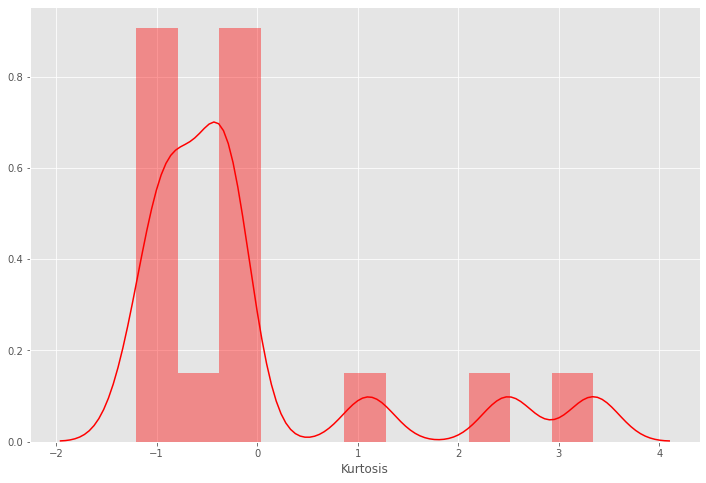

In [59]:
# Comparando a distribuição com e verificando sua Kurtose
plt.figure(figsize = (12,8))
sns.distplot(macapa.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

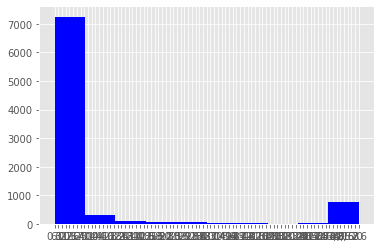

In [60]:
# precipitação
plt.hist(macapa['precipitacao'],orientation = 'vertical',histtype = 'bar', color ='blue')
plt.show()

(array([3.000e+00, 5.000e+00, 5.000e+01, 1.900e+02, 4.360e+02, 8.760e+02,
        8.890e+02, 1.303e+03, 1.491e+03, 3.361e+03]),
 array([3.55534806, 3.65624807, 3.75714809, 3.8580481 , 3.95894811,
        4.05984813, 4.16074814, 4.26164815, 4.36254817, 4.46344818,
        4.56434819]),
 <a list of 10 Patch objects>)

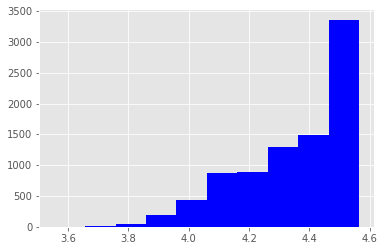

In [61]:
target = np.log(macapa['umid_inst'])
target.skew()
plt.hist(target,color='blue')

# Correlação 

- ## Dendrograma

Permite correlacionar mais completamente a conclusão das variáveis, revelando tendências mais profundas do que as pares aos pares visíveis no mapa de calor da correlação:

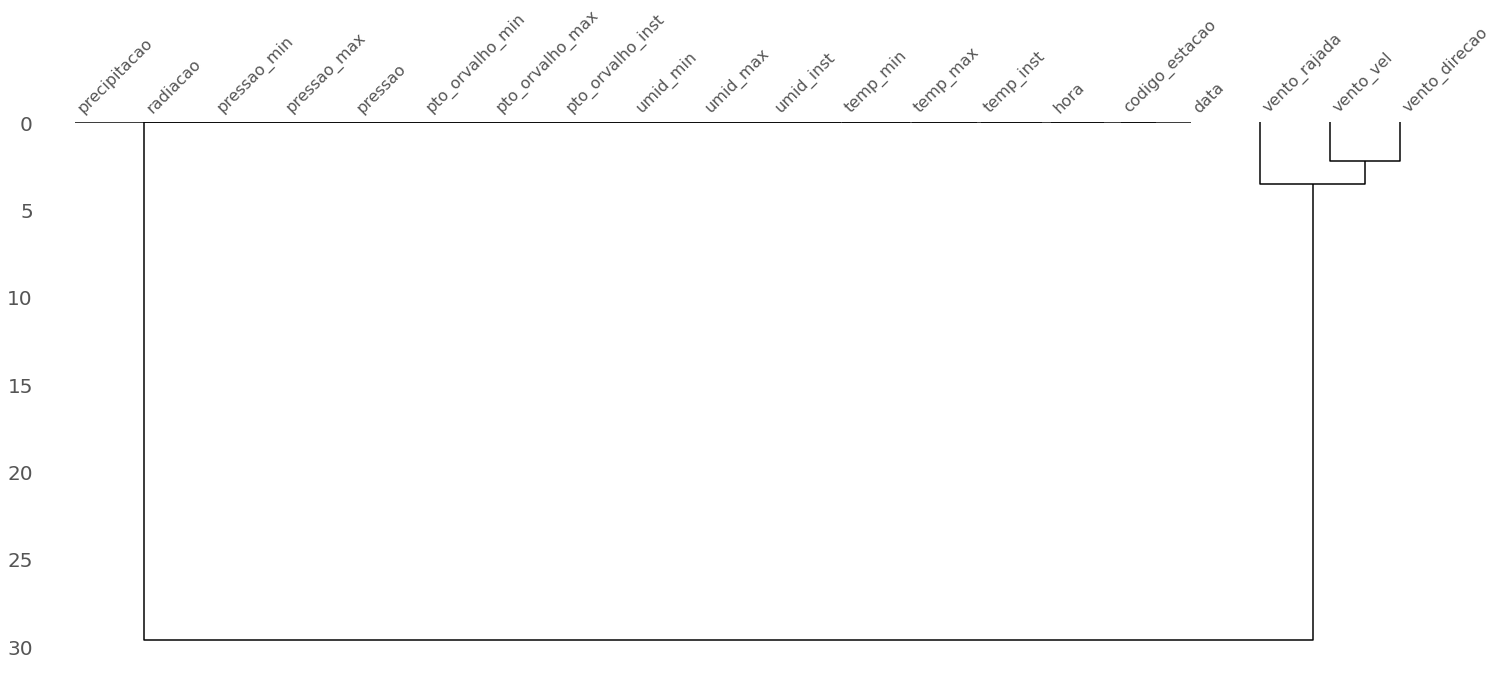

In [62]:
msno.dendrogram(macapa)

- ### Matrix de Correlação

In [63]:
corr = macapa.corr(method = 'pearson')
corr

,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,radiacao
hora,1.000000,0.517565,0.553078,0.494125,-0.510409,-0.482657,-0.546684,-0.180199,0.029298,-0.364771,-0.283134,-0.258074,-0.281205,0.458222,0.062431,0.459457
temp_inst,0.517565,1.000000,0.974701,0.967958,-0.963265,-0.917509,-0.938383,-0.270632,0.032281,-0.452389,-0.214351,-0.149495,-0.177852,0.750252,-0.108565,0.793350
temp_max,0.553078,0.974701,1.000000,0.958971,-0.949100,-0.918693,-0.967446,-0.290370,0.027806,-0.488684,-0.241370,-0.176663,-0.206089,0.780666,-0.096657,0.771375
temp_min,0.494125,0.967958,0.958971,1.000000,-0.949139,-0.959793,-0.939310,-0.325746,-0.063409,-0.478483,-0.293332,-0.231238,-0.255322,0.751637,-0.111542,0.704535
umid_inst,-0.510409,-0.963265,-0.949100,-0.949139,1.000000,0.965822,0.973286,0.504523,0.188646,0.633438,0.219169,0.156335,0.181992,-0.764212,0.114225,-0.755419
umid_max,-0.482657,-0.917509,-0.918693,-0.959793,0.965822,1.000000,0.958691,0.539248,0.307921,0.667642,0.294510,0.235836,0.258035,-0.744705,0.124921,-0.655879
umid_min,-0.546684,-0.938383,-0.967446,-0.939310,0.973286,0.958691,1.000000,0.477859,0.183381,0.660469,0.245183,0.183888,0.210785,-0.778043,0.097138,-0.719536
pto_orvalho_inst,-0.180199,-0.270632,-0.290370,-0.325746,0.504523,0.539248,0.477859,1.000000,0.829891,0.883460,0.141916,0.112106,0.116687,-0.319227,0.054686,-0.230337
pto_orvalho_max,0.029298,0.032281,0.027806,-0.063409,0.188646,0.307921,0.183381,0.829891,1.000000,0.723132,0.162925,0.169483,0.157059,-0.036602,0.086880,0.141109
pto_orvalho_min,-0.364771,-0.452389,-0.488684,-0.478483,0.633438,0.667642,0.660469,0.883460,0.723132,1.000000,0.167340,0.123681,0.141841,-0.450635,0.027720,-0.393786


- ### HeatMap Correlação 

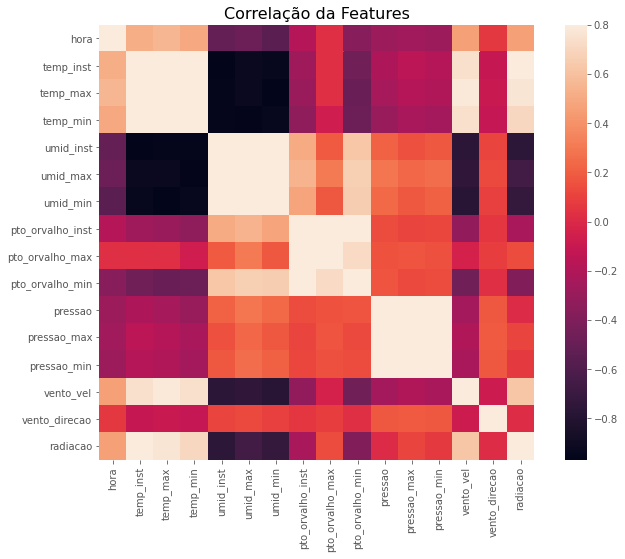

In [64]:
ax = plt.subplots(figsize=(11, 8))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr,square = True,  vmax=0.8)

- ### Zoomed HeatMap

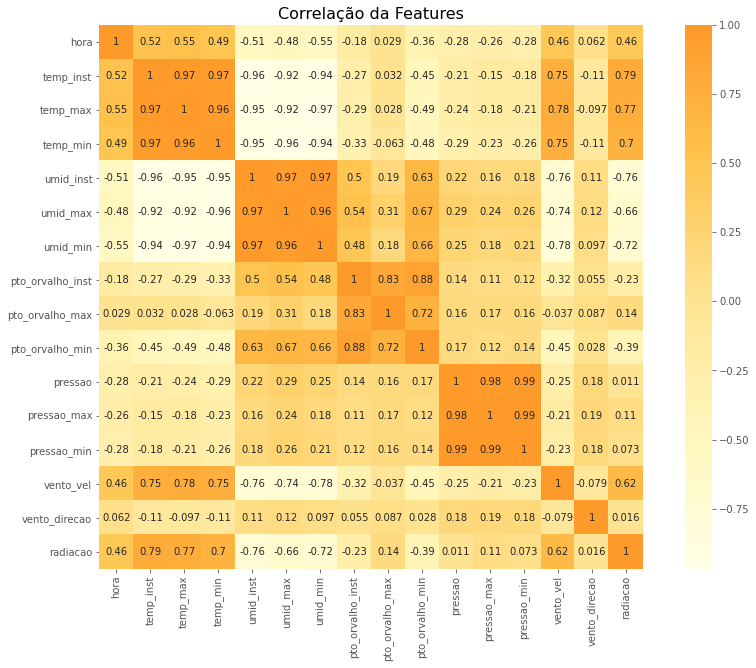

In [65]:
plt.subplots(figsize=(15, 10))

plt.title('Correlação da Features',y=1,size=16)

sns.heatmap(corr, center=True, square=True, annot=True, cmap="YlOrBr");

# Verificar Distribuição

- ### Boxplot

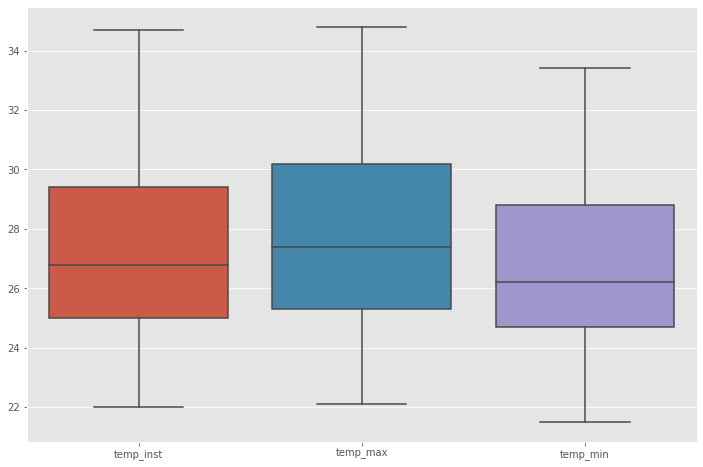

In [66]:
# temperatura
plt.subplots(figsize=(12, 8))

sns.boxplot(data=macapa.loc[:, ["temp_inst", "temp_max", "temp_min"]]);

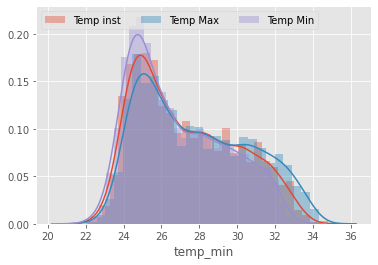

In [67]:
sns.distplot(macapa.temp_inst)
sns.distplot(macapa.temp_max)
sns.distplot(macapa.temp_min)
plt.legend(labels=['Temp inst','Temp Max','Temp Min'], ncol=3, loc='upper left');

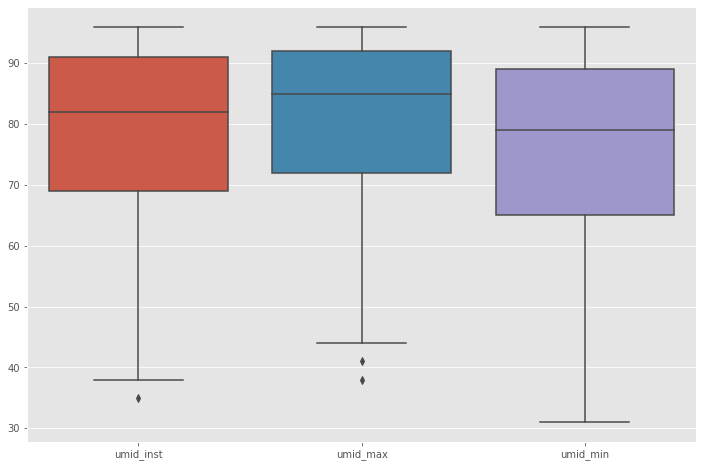

In [68]:
# umidade 
plt.subplots(figsize=(12, 8))

sns.boxplot(data=macapa.loc[:, ["umid_inst", "umid_max", "umid_min"]]);

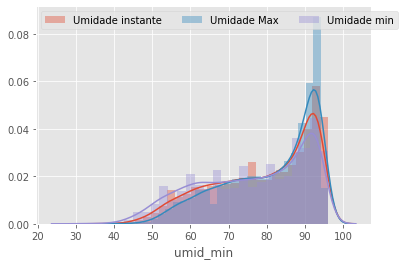

In [69]:
sns.distplot(macapa.umid_inst)
sns.distplot(macapa.umid_max)
sns.distplot(macapa.umid_min)
plt.legend(labels=['Umidade instante','Umidade Max','Umidade min'], ncol=3, loc='upper left');

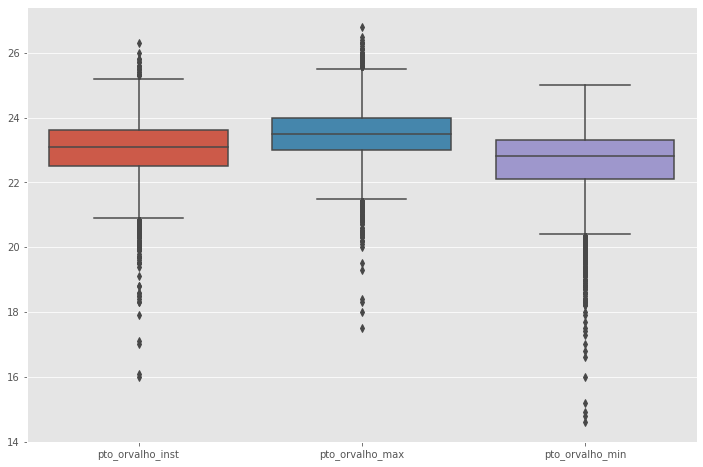

In [70]:
# pt_orvalho (um negocio que ne nem sei o que é)
plt.subplots(figsize=(12, 8))

sns.boxplot(data=macapa.loc[:,["pto_orvalho_inst", "pto_orvalho_max", "pto_orvalho_min"]]);

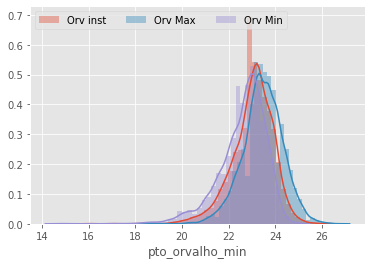

In [71]:
sns.distplot(macapa.pto_orvalho_inst)
sns.distplot(macapa.pto_orvalho_max)
sns.distplot(macapa.pto_orvalho_min)
plt.legend(labels=['Orv inst','Orv Max','Orv Min'], ncol=3, loc='upper left');

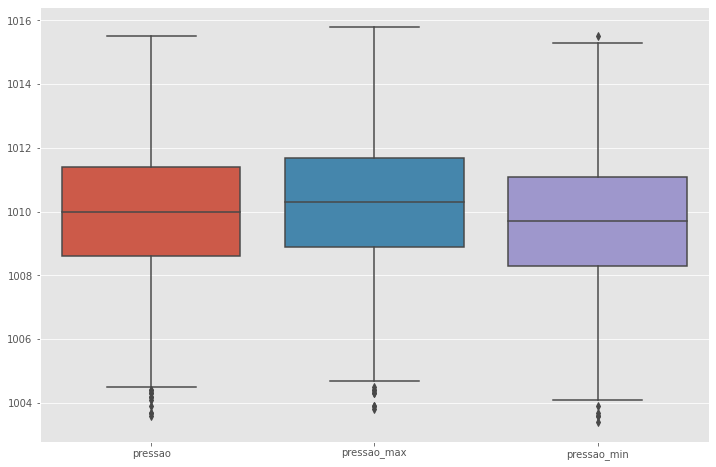

In [72]:
# pressão atmosferica
plt.subplots(figsize=(12, 8))

sns.boxplot(data=macapa.loc[:,["pressao", "pressao_max","pressao_min"]]);    

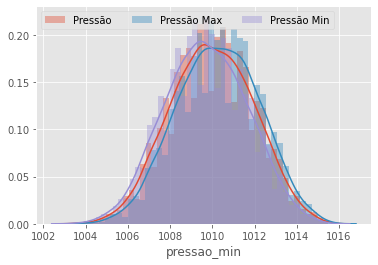

In [73]:
sns.distplot(macapa.pressao)
sns.distplot(macapa.pressao_max)
sns.distplot(macapa.pressao_min)
plt.legend(labels=['Pressão','Pressão Max','Pressão Min'], ncol=3, loc='upper left');

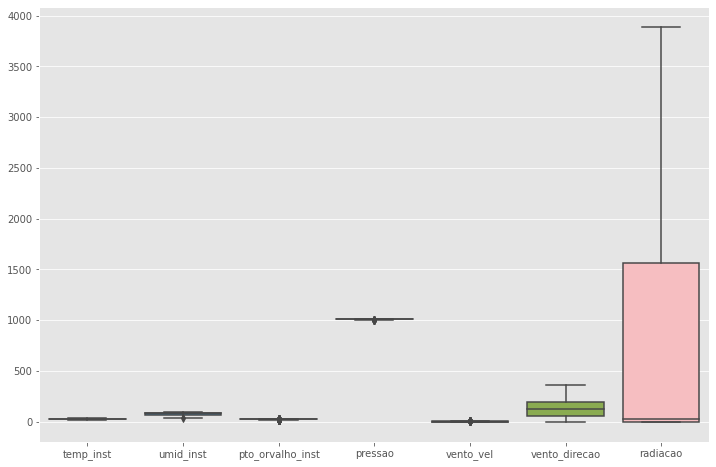

In [74]:
# visão de geral

features = ["temp_inst", "umid_inst", "pto_orvalho_inst",
            "pressao", "vento_vel", "vento_direcao",
            "vento_rajada", "radiacao","precipitacao"]

plt.subplots(figsize=(12, 8))


sns.boxplot(data=macapa.loc[:, features]);  